In [1]:
import pandas as pd

In [2]:
import matplotlib.animation as animation

In [3]:
import networkx as nx

In [4]:
import pytz

In [5]:
import matplotlib.pyplot as plt

In [6]:
from IPython.display import clear_output

In [7]:
import datetime

In [8]:
def comtime(x): #Converting time from Unix to Current for verification.
    unix_time = x
    datetime_obj = datetime.datetime.fromtimestamp(unix_time)
    eastern_tz = pytz.timezone('US/Eastern')
    datetime_obj_et = datetime_obj.astimezone(eastern_tz)
    return datetime_obj_et

In [9]:
def timerman(x):
    unix_time = x
    datetime_obj = datetime.datetime.fromtimestamp(unix_time)
    eastern_tz = pytz.timezone('US/Eastern')
    datetime_obj_et = datetime_obj.astimezone(eastern_tz)
    return (datetime_obj_et.strftime('%Y-%m-%d %H:%M:%S %Z%z'))

In [10]:
Stations = pd.read_csv( 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/NYCSubwayNodes.csv' , index_col=None, header=0 )
Stations.head() #Getting the station ID list from class files. Credit to CUSP ADS Class.

,name,id,boro,lat,long,lines
0,Greenpoint Av,G26,Bk,40.731352,-73.954449,G
1,21 St,G24,Q,40.744065,-73.949724,G
2,Court Sq,G22,Q,40.746554,-73.943832,G
3,36 St,G20,Q,40.752039,-73.928781,M R
4,Queens Plaza,G21,Q,40.748973,-73.937243,E M R


In [11]:
Stations.loc[Stations.id=='A03'].name #Testing

126    Dyckman St
Name: name, dtype: object

In [12]:
#Connection list from class files. Credit to CUSP ADS Class.
Links = pd.read_csv( 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/NYCSubwayEdges.csv' , index_col=None, header=0 )
Links.head() #Sample of links.

,origin,dest
0,G26,G24
1,G26,G28
2,G24,G26
3,G24,G22
4,G22,G24


In [13]:
#Create a dictionary of subway stations by name and location from CUSP ADS Class.
StPos={Stations.id[c]:(Stations.long[c],Stations.lat[c]) for c in Stations.index}
StName={Stations.id[c]:Stations.name[c] for c in Stations.index}

In [14]:
#Creation of Network Graph.
NYCSubway=nx.DiGraph()
for i in Links.index:
    NYCSubway.add_edge(Links.origin[i],Links.dest[i])  

In [15]:
def visualize_path(vals,directions,train): #Visualizing the train network and train locations.
    plt.figure(figsize = (30,40))
    nx.draw(NYCSubway,pos=StPos,with_labels=False,arrows=False,node_size=1,width=1,edge_color='black')
    x = [StPos[v][0] for v in vals]
    y = [StPos[v][1] for v in vals]
    
    for i in range(len(directions)): #Using directions array to ascertain train direction (N/S to Uptown/Downtown)
        x = [StPos[vals[i]][0]] #Train positions based upon train station locations.
        y = [StPos[vals[i]][1]]
        if directions[i] == 'N':
            marker = r'$\uparrow$'
        elif directions[i] == 'S':
            marker = r'$\downarrow$'
        else:
            marker = "o"
            
        col = 'Blue'    
            
        if (train[i]=='1' or train[i]=='2'or train[i]=='3'): #Using train number from GTFS feed to ascertain train colour.
            col = 'Red'
        elif (train[i]=='4' or train[i]=='5'or train[i]=='6' or train[i]=='6X'):
            col = 'Green'
        elif (train[i]=='7' or train[i]=='7X'):
            col = 'Purple'
        elif (train[i]=='A' or train[i]=='C'or train[i]=='E'):
            col = 'Blue'
        elif (train[i]=='B' or train[i]=='D'or train[i]=='F'or train[i]=='M'):
            col = 'Orange'
        elif (train[i]=='N' or train[i]=='Q'or train[i]=='R'or train[i]=='W'):
            col = 'Yellow'
        elif (train[i]=='J' or train[i]=='Z'):
            col = 'Brown'
        elif (train[i]=='G'):
            col = 'Lime'
        elif (train[i]=='SI' or train[i]=='GS' or train[i]=='L'):
            col = 'Grey'
        
        plt.scatter(x, y, marker=marker,color = col, s = 300)

    plt.show()

# Main Execution Loop Below.

2023-05-10 12:47:02.163807


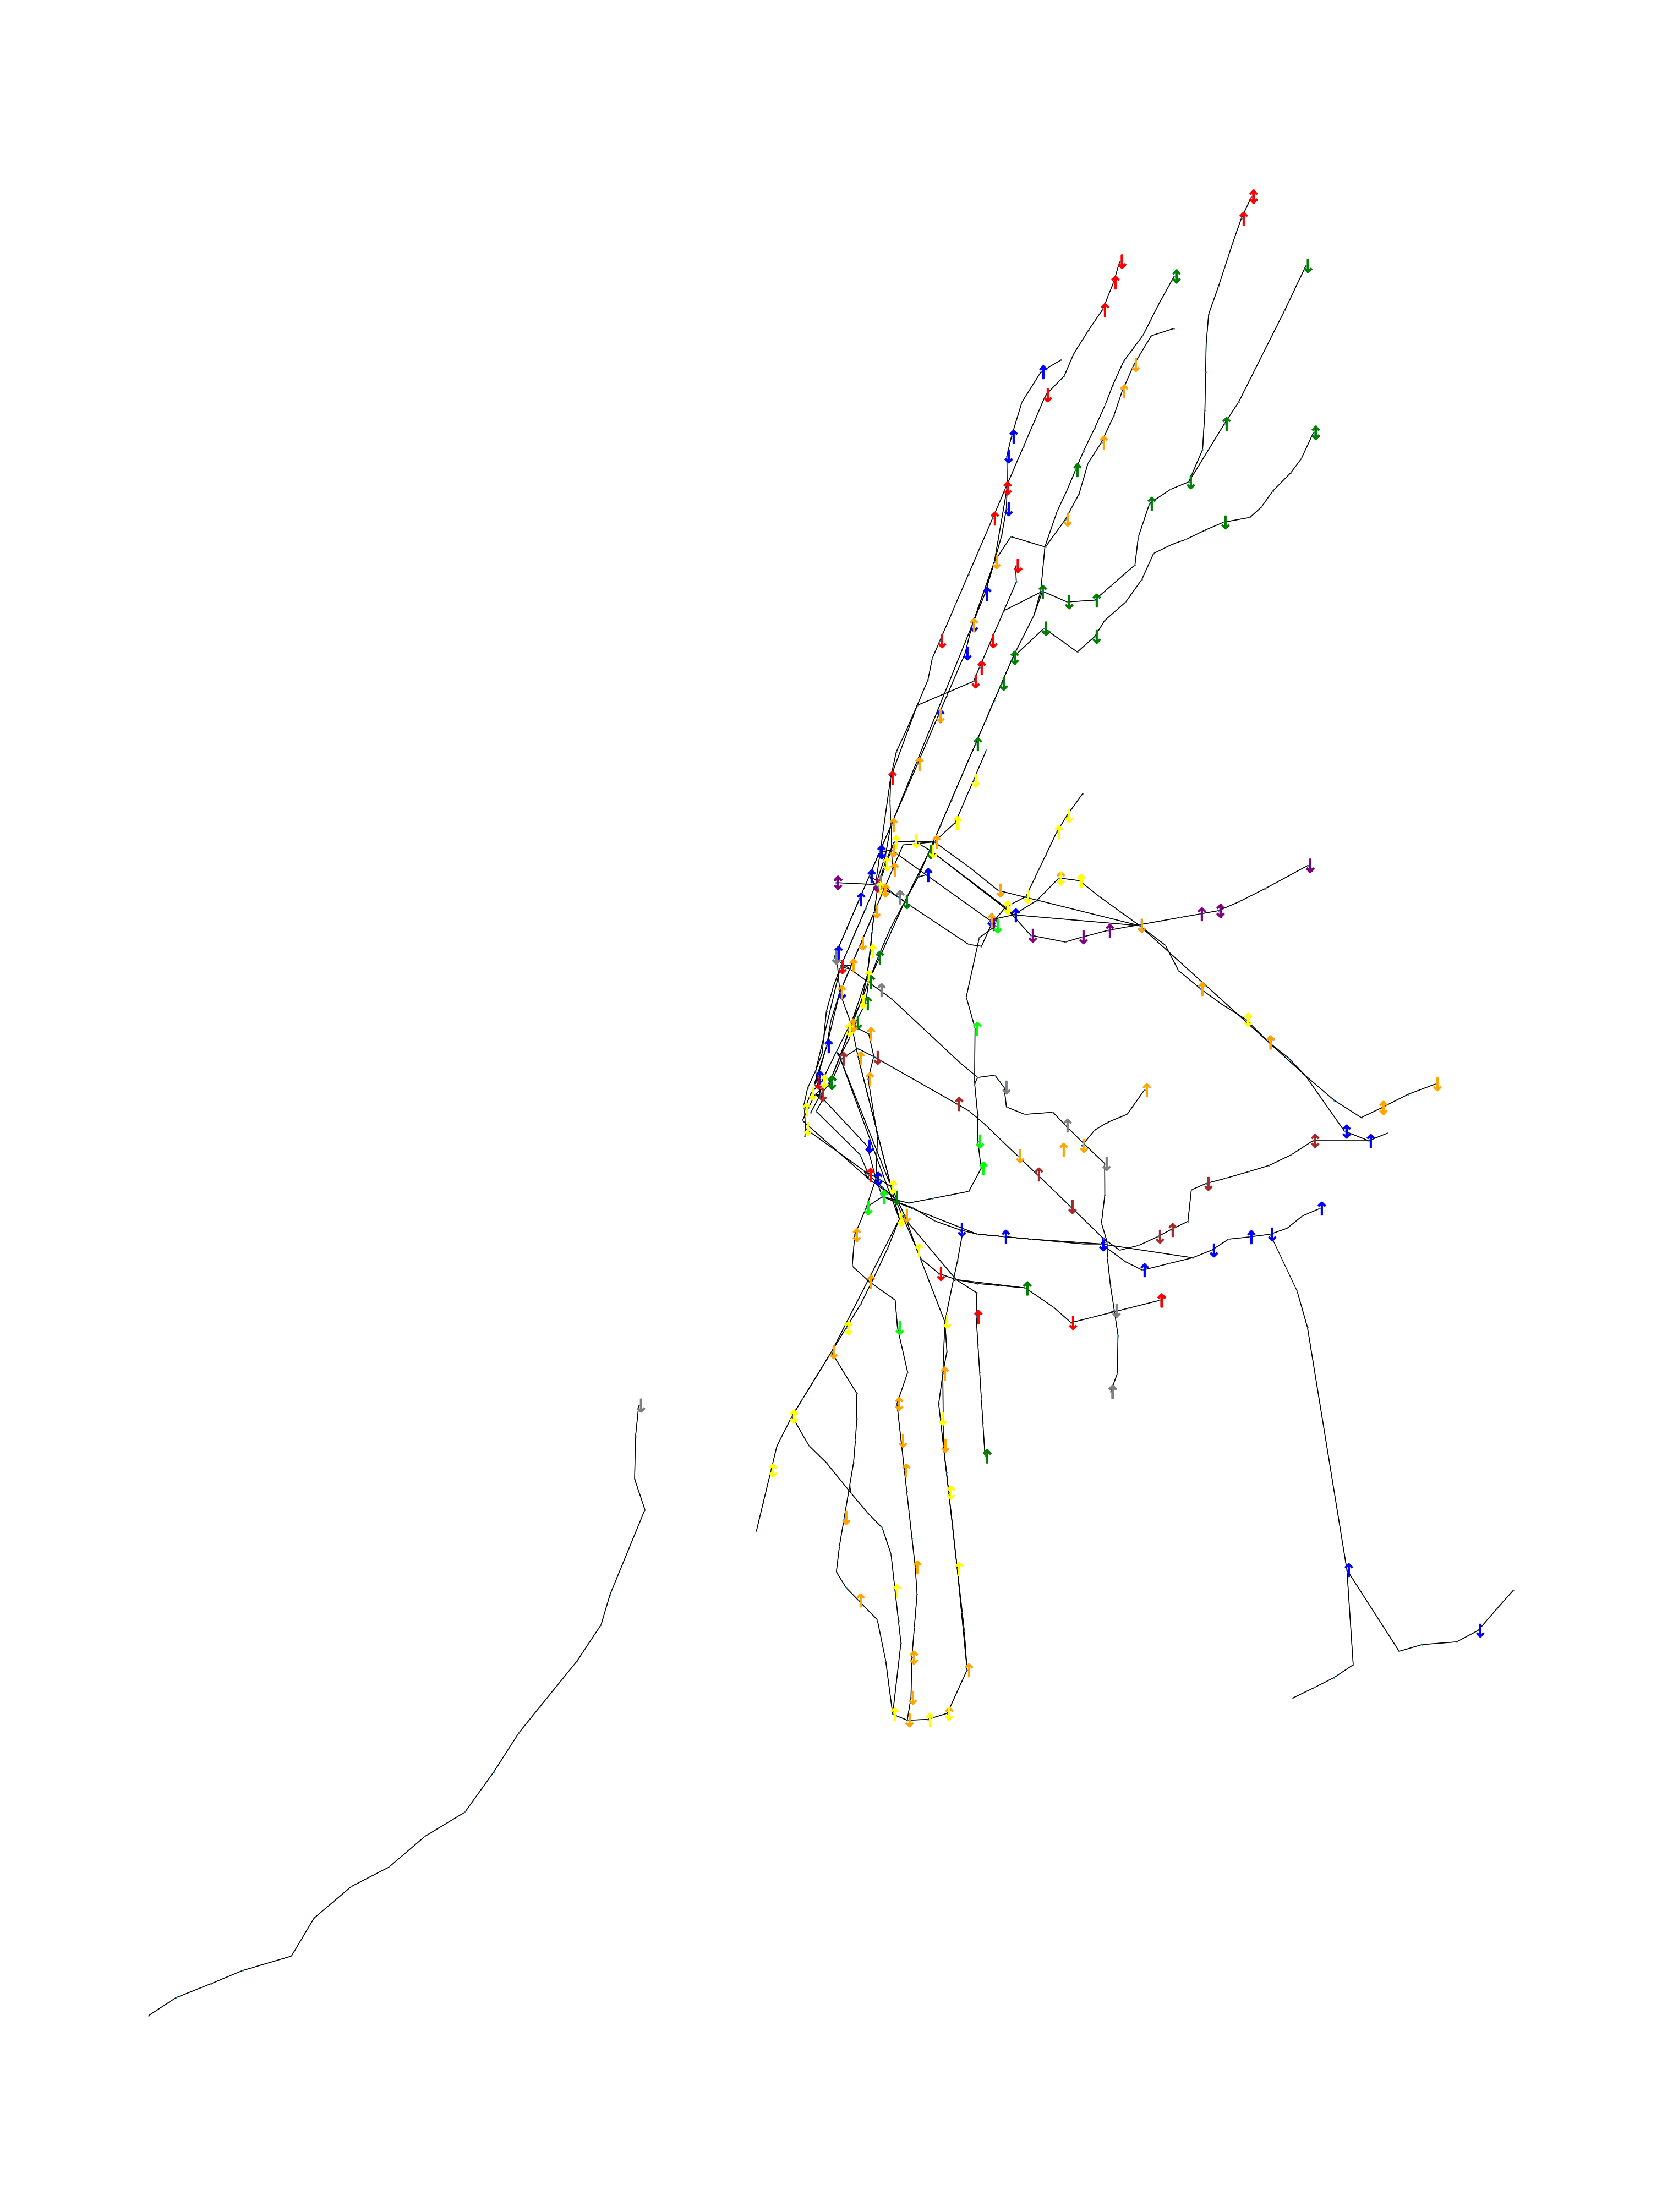

In [ ]:
import time
import requests
from google.transit import gtfs_realtime_pb2
boolman = False
%matplotlib inline

while True:
    
    sl = []
    sla = []
    dirs = []
    train = []

    # URLs for Train Feeds.
    url_17 = 'https://api-endpoint.mta.info/Dataservice/mtagtfsfeeds/nyct%2Fgtfs'
    url_ACE = 'https://api-endpoint.mta.info/Dataservice/mtagtfsfeeds/nyct%2Fgtfs-ace'
    url_BDFM = 'https://api-endpoint.mta.info/Dataservice/mtagtfsfeeds/nyct%2Fgtfs-bdfm'
    url_G = 'https://api-endpoint.mta.info/Dataservice/mtagtfsfeeds/nyct%2Fgtfs-g'
    url_JZ = 'https://api-endpoint.mta.info/Dataservice/mtagtfsfeeds/nyct%2Fgtfs-jz'
    url_L = 'https://api-endpoint.mta.info/Dataservice/mtagtfsfeeds/nyct%2Fgtfs-l'
    url_NQRW = 'https://api-endpoint.mta.info/Dataservice/mtagtfsfeeds/nyct%2Fgtfs-nqrw'
    url_SI = 'https://api-endpoint.mta.info/Dataservice/mtagtfsfeeds/nyct%2Fgtfs-si'

    # MTA API Key.
    api_key = '<API_KEY_HERE>'

    # Responses for each line.
    response_17 = requests.get(url_17, headers={'x-api-key': api_key})
    response_ACE = requests.get(url_ACE, headers={'x-api-key': api_key})
    response_BDFM = requests.get(url_BDFM, headers={'x-api-key': api_key})
    response_G = requests.get(url_G, headers={'x-api-key': api_key})
    response_JZ = requests.get(url_JZ, headers={'x-api-key': api_key})
    response_L = requests.get(url_L, headers={'x-api-key': api_key})
    response_NQRW = requests.get(url_NQRW, headers={'x-api-key': api_key})
    response_SI = requests.get(url_SI, headers={'x-api-key': api_key})

    feed_ACE = gtfs_realtime_pb2.FeedMessage()
    feed_ACE.ParseFromString(response_ACE.content)
    
    feed_17 = gtfs_realtime_pb2.FeedMessage()
    feed_17.ParseFromString(response_17.content)

    feed_BDFM = gtfs_realtime_pb2.FeedMessage()
    feed_BDFM.ParseFromString(response_BDFM.content)

    feed_G = gtfs_realtime_pb2.FeedMessage()
    feed_G.ParseFromString(response_G.content)

    feed_JZ = gtfs_realtime_pb2.FeedMessage()
    feed_JZ.ParseFromString(response_JZ.content)
    
    feed_L = gtfs_realtime_pb2.FeedMessage()
    feed_L.ParseFromString(response_L.content)
    
    feed_NQRW = gtfs_realtime_pb2.FeedMessage()
    feed_NQRW.ParseFromString(response_NQRW.content)
    
    feed_SI = gtfs_realtime_pb2.FeedMessage()
    feed_SI.ParseFromString(response_SI.content)

    feed = gtfs_realtime_pb2.FeedMessage()
    feed.entity.extend(feed_17.entity)
    feed.entity.extend(feed_ACE.entity)
    feed.entity.extend(feed_BDFM.entity)
    feed.entity.extend(feed_G.entity)
    feed.entity.extend(feed_JZ.entity)
    feed.entity.extend(feed_L.entity)
    feed.entity.extend(feed_NQRW.entity)
    feed.entity.extend(feed_SI.entity)
    
    #Printing current time.
    print(datetime.datetime.now())
    
    for entity in feed.entity:
        if entity.HasField('trip_update'):
            boolman = False     
            timetracker = False         
            bols = 0       
            ArrivalTime = 0
            
            try:
                while(True):
                    ArrivalTime = timerman(entity.trip_update.stop_time_update[bols].arrival.time)
                    if(entity.trip_update.stop_time_update[bols].arrival.time>(5+int(time.time()))):
                        bols = bols + 1
                    else:
                        break
                
                Stop = (Stations.loc[Stations.id==((entity.trip_update.stop_time_update[bols].stop_id)[:-1])])['name'].tolist()[0]
                Direction = (entity.trip_update.stop_time_update[bols].stop_id)[-1:]
                ArrivalTime = timerman(entity.trip_update.stop_time_update[bols].arrival.time)
                trainlev = entity.trip_update.trip.route_id
                sl.append(Stop)
                sla.append((entity.trip_update.stop_time_update[bols].stop_id)[:-1])
                dirs.append(Direction)
                train.append(trainlev)
                boolman = True
            except Exception:
                boolman = False
                
    visualize_path(sla,dirs,train) #Visualizing feed.
    time.sleep(25) #Sleeping for 25 seconds before next pull.
    clear_output(wait=False)